In [1]:
import os
import pandas as pd
from utils.visuailize import visualize_nii_slices, tree
os.chdir('..')

## Dicom dir looks like

In [2]:
tree('./example/sample_data', max_files=3)

sample_data/
    MR201403200524/
        1.2.840.113619.2.176.3596.11861954.7743.1395176361.648.dcm
        1.2.840.113619.2.176.3596.11861954.7743.1395176361.878.dcm
        1.2.840.113619.2.176.3596.11861954.7743.1395176359.757.dcm
        ... and 942 more files
    020/
        MR417599/
            DJ20221225A0071/
                ApparentDiffusionCoefficient(mm2s)_700_7/
                    3.0.dcm
                    20.0.dcm
                    22.0.dcm
                    ... and 21 more files
                3PlLocSSFSE_1_1/
                    3.0.dcm
                    10.0.dcm
                    7.0.dcm
                    ... and 16 more files
                ExponentialApparentDiffusionCoefficient_701_8/
                    ... and more files (reached max_lines=20)

... and more directories (reached max_lines=20)


## Convert to Nifti

In [3]:
%run dcmsort2nii/parallel.py example/sample_data -o example/sample_output 

Scanning directories...
Found 9 DICOM directories to process


Extracting metadata: 100%|██████████| 34/34 [00:00<00:00, 1749.90it/s]


Saving excel file...
Excel saved to: example/sample_output/nifti_dicom_mapping.xlsx


## Output dir looks like

In [4]:
tree('./example/sample_output', max_files=3)

sample_output/
    nifti_dicom_mapping.xlsx
    MR201403200524/
        OAx_T2_3d7c53db.nii.gz
        Reformatted_5989351a.nii.gz
        OAx_T1_68182936.nii.gz
        ... and 19 more files
    restructured/
        1.2.840.113619.2.176.3596.11861954.7814.1395176224.840/
            Ax_LAVA+C_6c0619eb_vol_0002.nii.gz
            Ax_LAVA+C_6c0619eb_vol_0001.nii.gz
            Ax_LAVA+C_6c0619eb_vol_0000.nii.gz
        1.2.840.113619.2.176.3596.11861954.7814.1395176224.841/
            Cor_LAVA+C_3dc85c1b.nii.gz
        1.2.840.113619.2.176.3596.11861954.7814.1395176224.823/
            Ax_fs_T2_RT_9422258c.nii.gz
        1.2.840.113619.2.176.3596.11861954.7814.1395176224.817/
            OAx_T2FLAIR_0482e25f.nii.gz
        1.2.840.113619.2.353.2807.8095175.15521.1670925686.621/
            OSag_T2FSE_7cf56059.nii.gz

... and more directories (reached max_lines=20)


## Save meta data and mapping between dicom and nifti files

In [5]:
import pandas as pd
mapping = pd.read_excel('example/sample_output/nifti_dicom_mapping.xlsx')
print(f"number of columns: {len(mapping.columns)}")
# instead of displaying the full path
mapping['Nifti Filename'] = mapping['NiftiFile'].apply(lambda x: os.path.basename(x))
mapping['First Dicom Filename'] = mapping['FirstDicomFile'].apply(lambda x: os.path.basename(x))
mapping[['Nifti Filename', 'First Dicom Filename', 'Acquisition Date', 'SOP Class UID', 'Series Instance UID', 'Modality']].head()


number of columns: 329


,Nifti Filename,First Dicom Filename,Acquisition Date,SOP Class UID,Series Instance UID,Modality
0,Apparent_Diffusion_Coefficient_(mm2_s)_4ab9cc5...,3.0.dcm,20221225,1.2.840.10008.5.1.4.1.1.4,1.2.840.113619.2.5.202124252171671929690167192...,MR
1,Exponential_Apparent_Diffusion_Coefficient_1bf...,3.0.dcm,20221225,1.2.840.10008.5.1.4.1.1.4,1.2.840.113619.2.5.202124252171671929692167192...,MR
2,3-pl_Loc_T2*_ddc1a0ec.nii.gz,1.2.840.113619.2.176.3596.11861954.7743.139517...,20140320,1.2.840.10008.5.1.4.1.1.4,1.2.840.113619.2.176.3596.11861954.7814.139517...,MR
3,3-pl_Loc_T2*_308adb42.nii.gz,1.2.840.113619.2.176.3596.11861954.7743.139517...,20140320,1.2.840.10008.5.1.4.1.1.4,1.2.840.113619.2.176.3596.11861954.7814.139517...,MR
4,3-pl_ssfse_Loc_2c80b97c_vol_0000.nii.gz,1.2.840.113619.2.176.3596.11861954.7743.139517...,20140320,1.2.840.10008.5.1.4.1.1.4,1.2.840.113619.2.176.3596.11861954.7814.139517...,MR


Image 1: example/sample_output/020/MR417599/DJ20221225A0071/OCorT2FSE_4_4/OCor_T2FSE_90a677a0.nii.gz
Image 2: example/sample_output/MR201403200524/OAx_T2FLAIR_0482e25f.nii.gz
Image 3: example/sample_output/MR201403200524/3-pl_Loc_T2*_308adb42.nii.gz
Image 4: example/sample_output/020/MR417599/DJ20221225A0071/AxeDWIspecial_7_6/Ax_eDWI_special_98f98213_vol_0003.nii.gz
Image 5: example/sample_output/MR201403200524/Ax_LAVA+C_6c0619eb_vol_0001.nii.gz
Image 6: example/sample_output/020/MR417599/DJ20221225A0071/AxeDWIspecial_7_6/Ax_eDWI_special_98f98213_vol_0002.nii.gz
Image 7: example/sample_output/MR201403200524/OSag_fs_T2_3e5c747e.nii.gz
Image 8: example/sample_output/020/MR417599/DJ20221225A0071/AxeDWIspecial_7_6/Ax_eDWI_special_98f98213_vol_0001.nii.gz
Image 9: example/sample_output/020/MR417599/DJ20221225A0071/AxeDWIspecial_7_6/Ax_eDWI_special_98f98213_vol_0000.nii.gz
Image 10: example/sample_output/MR201403200524/Cor_LAVA+C_3dc85c1b.nii.gz
Image 11: example/sample_output/MR201403200524

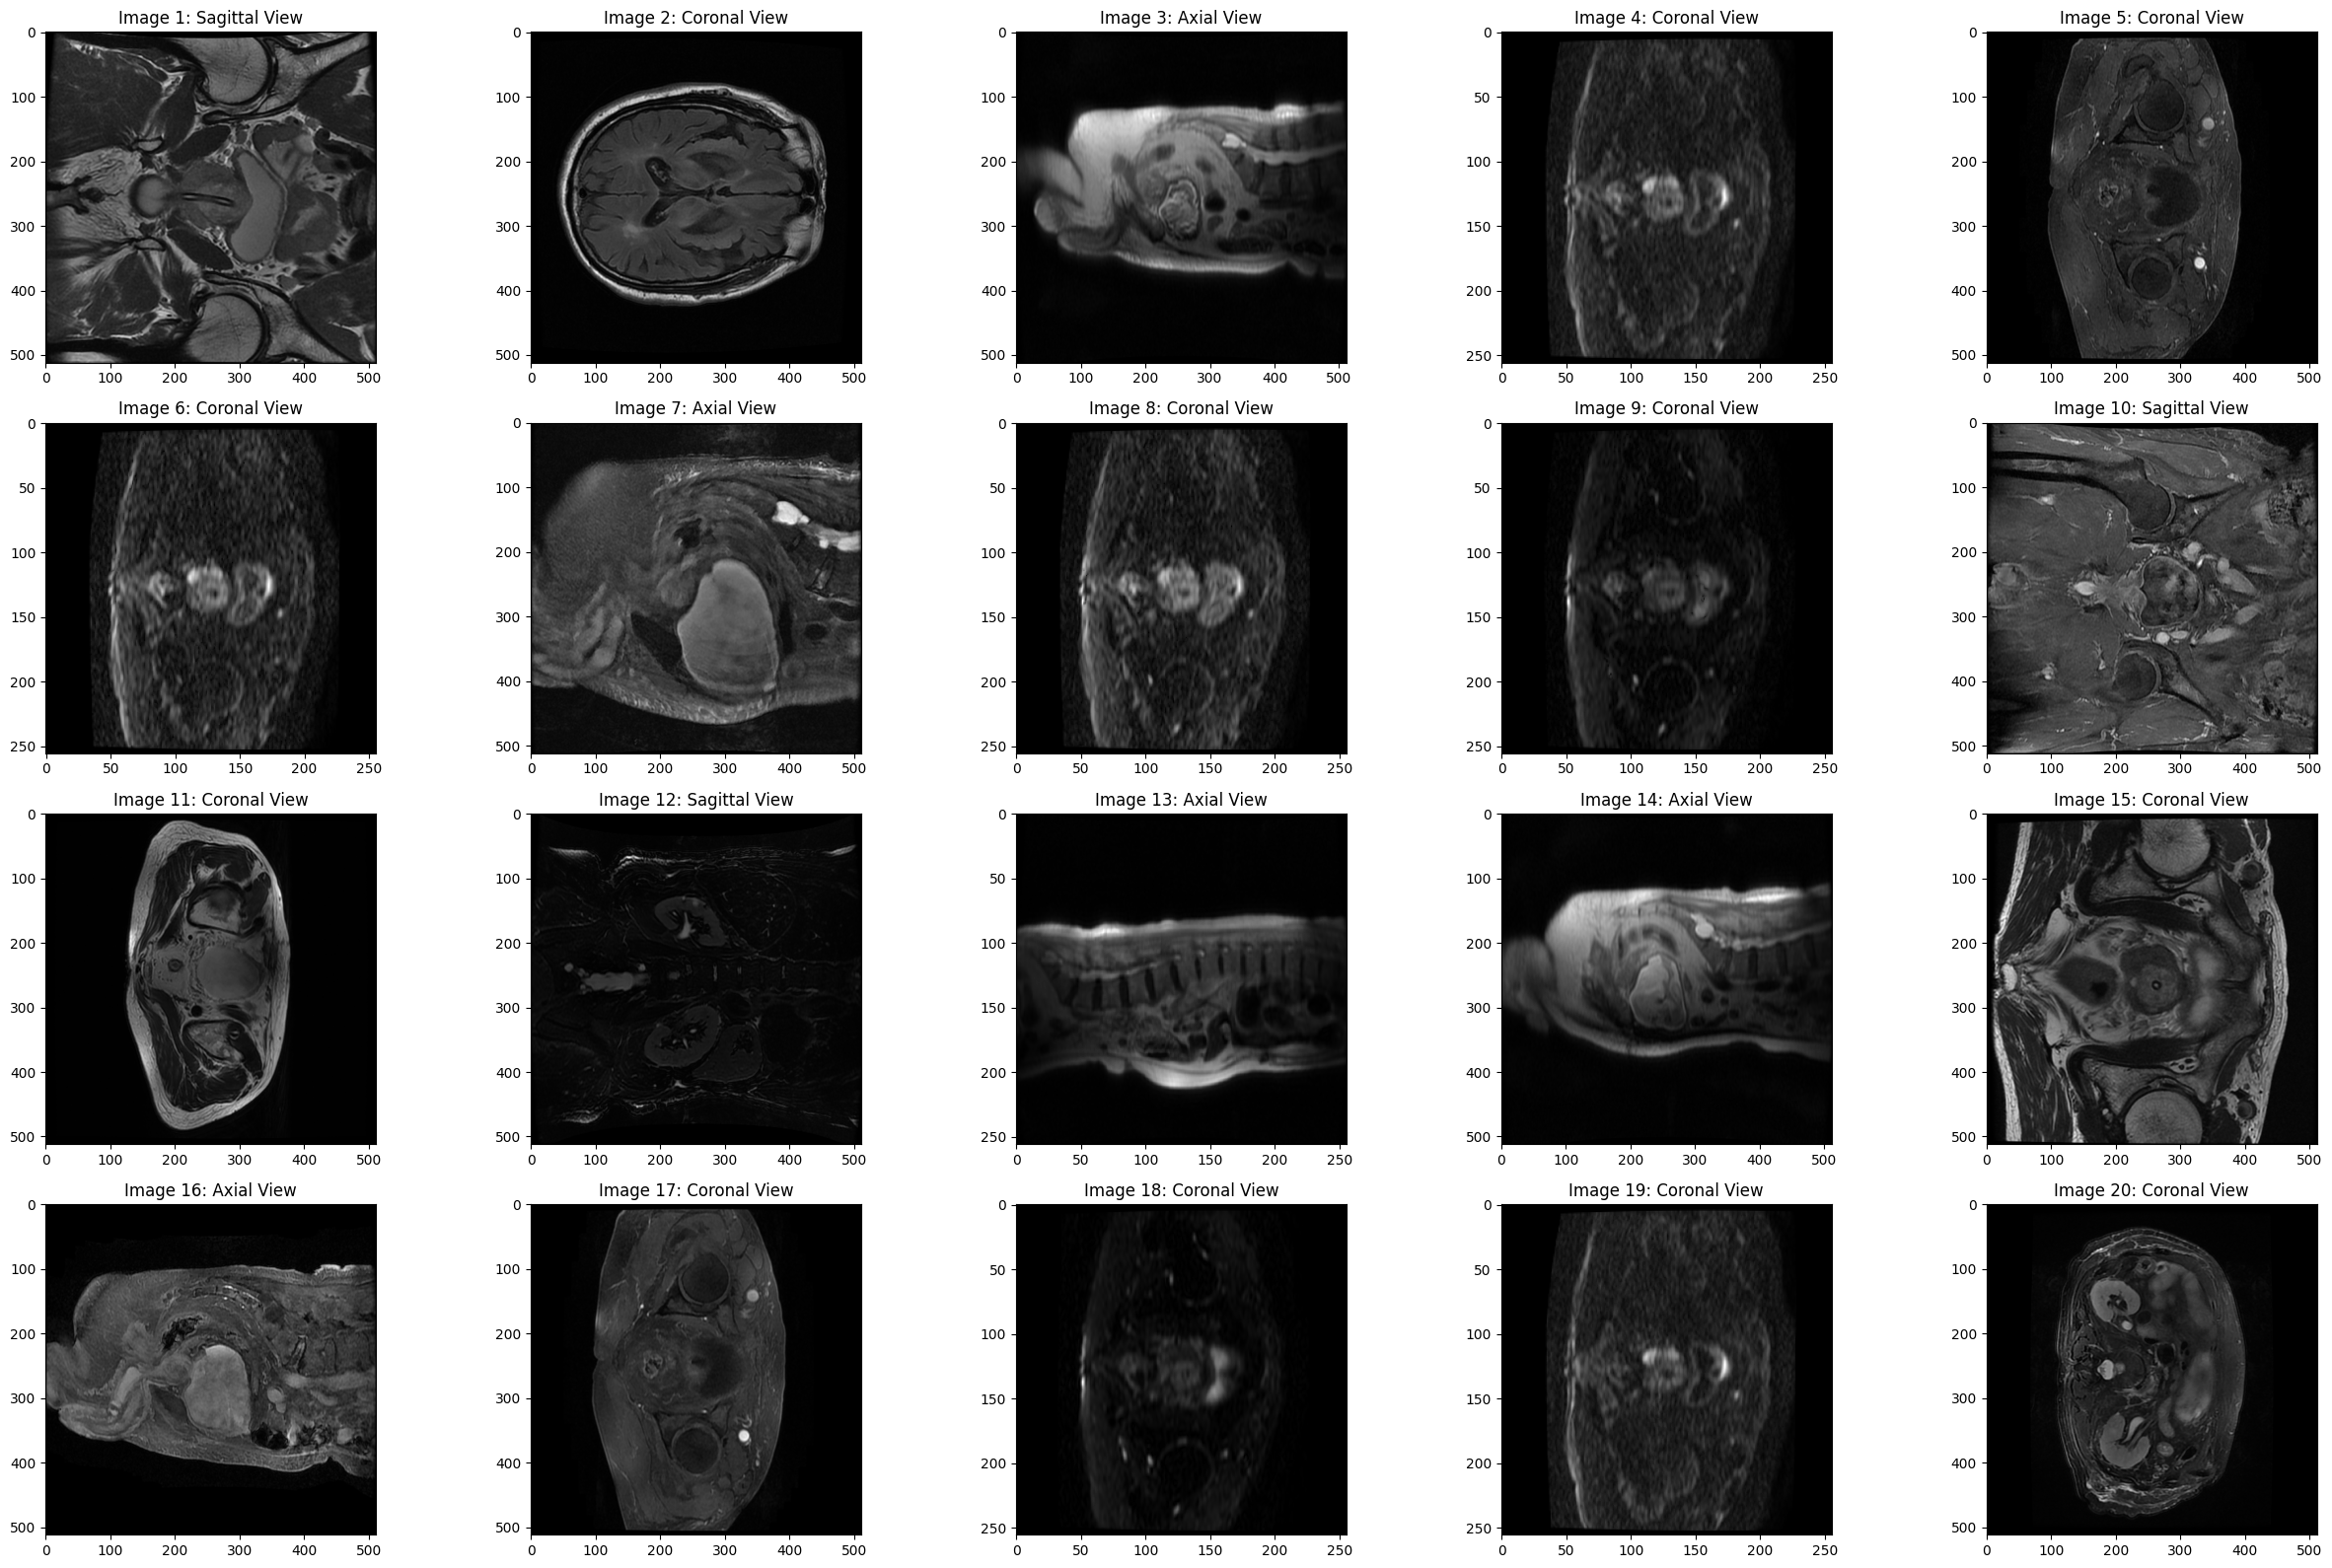

In [6]:
nifti_list = mapping['NiftiFile'].sample(len(mapping), random_state=1).tolist()
visualize_nii_slices(nifti_list,)

## Restructure the directory using metadata (do anything you want)

In [7]:
new_output_dir = 'example/sample_output/restructured'
os.makedirs(new_output_dir, exist_ok=True)
for _, row in mapping.iterrows():
    series_dir = os.path.join(new_output_dir, row['Series Instance UID'])
    os.makedirs(series_dir, exist_ok=True)
    nifti_file = row['NiftiFile']
    new_nifti_file = os.path.join(series_dir, os.path.basename(nifti_file))
    os.rename(nifti_file, new_nifti_file)
tree(new_output_dir, max_files=3)

restructured/
    1.2.840.113619.2.176.3596.11861954.7814.1395176224.840/
        Ax_LAVA+C_6c0619eb_vol_0002.nii.gz
        Ax_LAVA+C_6c0619eb_vol_0001.nii.gz
        Ax_LAVA+C_6c0619eb_vol_0000.nii.gz
    1.2.840.113619.2.176.3596.11861954.7814.1395176224.841/
        Cor_LAVA+C_3dc85c1b.nii.gz
    1.2.840.113619.2.176.3596.11861954.7814.1395176224.823/
        Ax_fs_T2_RT_9422258c.nii.gz
    1.2.840.113619.2.176.3596.11861954.7814.1395176224.817/
        OAx_T2FLAIR_0482e25f.nii.gz
    1.2.840.113619.2.353.2807.8095175.15521.1670925686.621/
        OSag_T2FSE_7cf56059.nii.gz
    1.2.840.113619.2.176.3596.11861954.7814.1395176224.820/
        3-pl_ssfse_Loc_2c80b97c_vol_0001.nii.gz
        3-pl_ssfse_Loc_2c80b97c_vol_0000.nii.gz
    1.2.840.113619.2.176.3596.11861954.7814.1395176224.831/
        Ax_fs_T2_RT_b23cfb7a.nii.gz
    1.2.840.113619.2.176.3596.11861954.7814.1395176224.838/
        OAx_T1_e106299d.nii.gz

... and more directories (reached max_lines=20)
